In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

### number classification using  artificial neural newtwork  on number datasets

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train.shape
#this means that we have total 60000 samples of size (28,28)

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

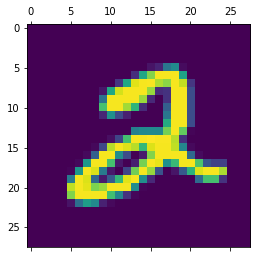

In [8]:
plt.matshow(X_train[5])

In [9]:
y_train[2]

4

In [10]:
y_train
# it is containing number between 0 to 9 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
# we need to flatten our X_train and X_test because it is in 2d array
X_train.shape

(60000, 28, 28)

In [12]:
#we can see that value is not scaled. here we are scaling the value in the range of 0 and 1 
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flatten.shape
#here there are 60000 samples with 784 is sencond dimension or (you can say dimensions of individual samples)

(60000, 784)

In [15]:
X_test_flatten.shape

(10000, 784)

In [16]:
X_train_flatten[0]
#we can see it is in single dimensions

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
# creating neural network 
#sequential means it will take value of array in sequence form 
#here 10 is shape of output layer (means 10 neurons on output layer side)
#here 784 is shape of input layer (784 neurons on input layer side )
# import metrics 
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9252


In [18]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9255


[0.26619377732276917, 0.9254999756813049]

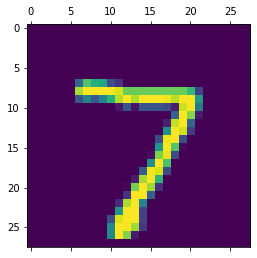

In [19]:
plt.matshow(X_test[0])
# first we are searching first value of X_teest that we find is 7 

In [20]:
y_predicted =model.predict(X_test_flatten)
y_predicted[0]
#now we are predicting first value using model it is returning an array of size ten 
#which means it contains possibility of 0 to 9 number according to their index

313/313 [==============================] - 0s 1ms/step


array([2.3166427e-02, 2.5992779e-07, 7.2090305e-02, 9.6115351e-01,
       2.9744045e-03, 1.2658773e-01, 2.4312562e-06, 9.9981534e-01,
       9.4692826e-02, 6.6896796e-01], dtype=float32)

In [21]:
#we are returning value of index with highest value 
np.argmax(y_predicted[0])

7

In [22]:
#here we are converting whole y_predicted array to actual integer value 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

In [25]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    3,    2,    0,    5,   11,    2,    3,    1],
       [   0, 1104,    4,    2,    1,    1,    4,    2,   17,    0],
       [   3,    6,  933,   13,    9,    4,   13,   10,   37,    4],
       [   3,    0,   24,  907,    0,   32,    2,   11,   24,    7],
       [   1,    1,    5,    2,  917,    0,   10,    4,    9,   33],
       [   6,    1,    5,   24,    8,  786,   14,    6,   36,    6],
       [   7,    3,    7,    1,    7,   12,  916,    2,    3,    0],
       [   1,    5,   24,    8,    9,    1,    0,  942,    2,   36],
       [   4,    4,    7,   17,    9,   20,   11,   13,  884,    5],
       [   8,    6,    2,   10,   29,    8,    0,   23,   10,  913]])>

Text(69.0, 0.5, 'truth')

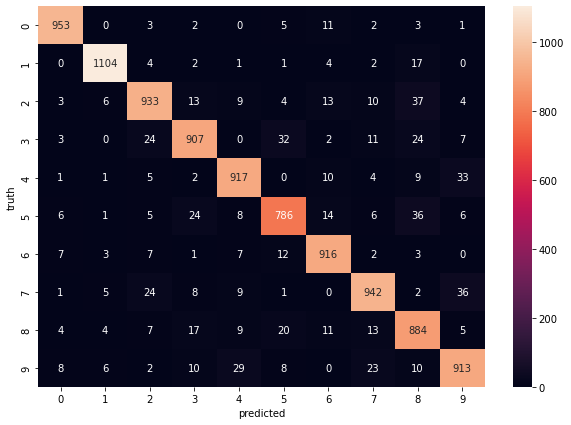

In [26]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')# annot equal to true means value will also be printed
plt.xlabel("predicted")          #fmt is format till how much decimal point it must be printed
plt.ylabel("truth")

### Adding hidden layer to same model

In [27]:
# creating neural network 
#sequential means it will take value of array in sequence form 
#here 10 is shape of output layer (means 10 neurons on output layer side)
#here 784 is shape of input layer (784 neurons on input layer side )
# import metrics 
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    #here 100 is value of number of hidden layer neurons (number of hidden layers)
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2768 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1242 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9848


In [28]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9760


[0.08046051114797592, 0.9760000109672546]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'truth')

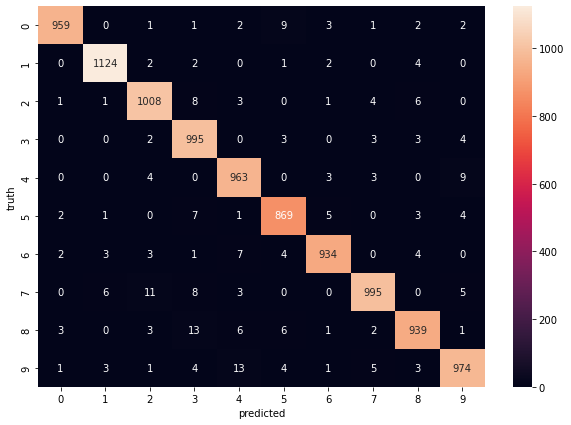

In [31]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
from sklearn.metrics import confusion_matrix
import tensorflow as tf
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')# annot equal to true means value will also be printed
plt.xlabel("predicted")          #fmt is format till how much decimal point it must be printed
plt.ylabel("truth")

### we can see that after adding hidden layer there is an improvement in our model 